In [4]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
projectFolder = "/Image_identification"

In [5]:
img = cv2.imread(projectFolder + "/testImages/tulsigabbard1.jpg")
img.shape

(251, 201, 3)

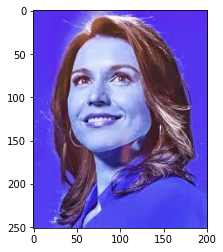

In [3]:
plt.imshow(img)

In [206]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(251, 201)

In [207]:
gray

array([[110, 110, 110, ..., 108, 108, 108],
       [110, 110, 110, ..., 108, 108, 108],
       [110, 110, 110, ..., 108, 108, 108],
       ...,
       [118, 118, 118, ..., 136, 127, 126],
       [118, 118, 118, ..., 136, 128, 126],
       [118, 118, 118, ..., 136, 128, 126]], dtype=uint8)

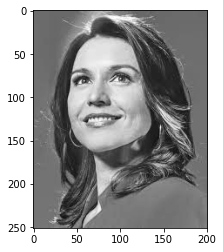

In [208]:
plt.imshow(gray, cmap='gray')

In [209]:
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 22,  35, 114, 114]], dtype=int32)

In [210]:
(x,y,w,h) = faces[0]
x,y,w,h

(22, 35, 114, 114)

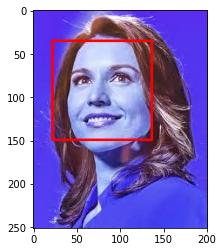

In [211]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

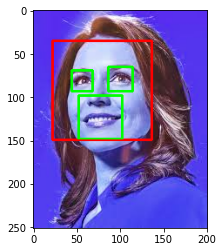

In [212]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

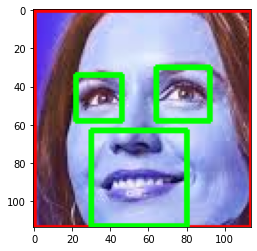

In [213]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [214]:
cropped_img = np.array(roi_color)
cropped_img.shape

(114, 114, 3)

In [215]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

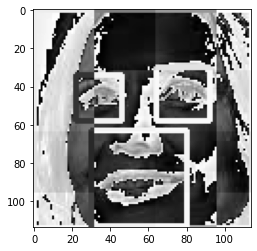

In [216]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [217]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

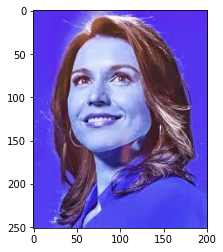

In [218]:
original_image = cv2.imread(projectFolder + "/testImages/tulsigabbard1.jpg")
plt.imshow(original_image)

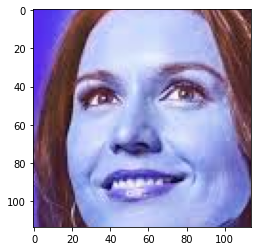

In [219]:
cropped_image = get_cropped_image_if_2_eyes(projectFolder + "/testImages/tulsigabbard1.jpg")
plt.imshow(cropped_image)

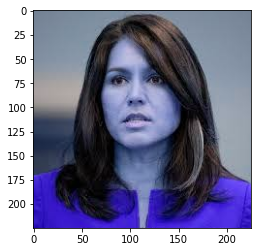

In [220]:
org_image_obstructed = cv2.imread(projectFolder + "/testImages/tulsigabbard2.jpg")
plt.imshow(org_image_obstructed)

In [222]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(projectFolder + "/testImages/viratkohli2.jpg")
cropped_image_no_2_eyes

In [223]:
import os
img_dirs = []

path_to_data = projectFolder + "/dataset/"
path_to_cr_data = projectFolder +"/dataset/cropped/"
print(path_to_data)


for entry in os.scandir(path_to_data):
    print(entry)
    if entry.is_dir():
        img_dirs.append(entry.path)

/Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/
<DirEntry 'ViratKohli'>
<DirEntry 'KamalaHarris '>
<DirEntry '.DS_Store'>
<DirEntry 'TulsiGabbard'>
<DirEntry 'ElonMusk'>
<DirEntry 'cropped'>
<DirEntry 'JoeRogan'>


In [224]:
img_dirs

['/Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ViratKohli',
 '/Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/KamalaHarris ',
 '/Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/TulsiGabbard',
 '/Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ElonMusk',
 '/Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/cropped',
 '/Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/JoeRogan']

In [225]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)
print(img_dirs)

['/Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ViratKohli', '/Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/KamalaHarris ', '/Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/TulsiGabbard', '/Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ElonMusk', '/Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/cropped', '/Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/JoeRogan']


In [226]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    #ignore cropped folder
    if celebrity_name == "cropped":
        continue
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        print('entry.path',entry.path)
        if not 'jpg' in entry.path:
             continue
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            print("Generating cropped images in folder: ",cropped_file_name)
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

ViratKohli
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ViratKohli/images (1).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ViratKohli/Z (2).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ViratKohli/images (13).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ViratKohli/2Q__ (6).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ViratKohli/images (29).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ViratKohli/images (33).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ViratKohli/images (25).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ViratKohli/2Q__ (10).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/Vi

entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/KamalaHarris /2Q__ (1).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/KamalaHarris /Z (5).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/KamalaHarris /images (6).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/KamalaHarris /december-holidays-days-2-30-6753651837108830.5-s.png
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/KamalaHarris /images (9).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/KamalaHarris /2Q__ (2).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/KamalaHarris /Z (6).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/KamalaHarris /images (5).jpg
Generating cropped images in folder:  KamalaHarr

Generating cropped images in folder:  /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/cropped/ElonMusk
Generating cropped images in folder:  ElonMusk1.jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ElonMusk/images (12).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ElonMusk/9k_.jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ElonMusk/Z (3).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ElonMusk/9k_ (1).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ElonMusk/9k_ (10).jpg
Generating cropped images in folder:  ElonMusk2.jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ElonMusk/images (19).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/ElonMusk/Z (8).jpg
Generati

entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/JoeRogan/images (4).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/JoeRogan/2Q__ (3).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/JoeRogan/images (8).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/JoeRogan/2Q__ (4).jpg
Generating cropped images in folder:  JoeRogan7.jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/JoeRogan/images (3).jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/JoeRogan/9k_ (2).jpg
Generating cropped images in folder:  JoeRogan8.jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identification/dataset/JoeRogan/2Q__ (8).jpg
Generating cropped images in folder:  JoeRogan9.jpg
entry.path /Users/shruti/ECE 505 Machine Learning/Project/Image_identificati

In [227]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'ViratKohli': 0,
 'KamalaHarris ': 1,
 'TulsiGabbard': 2,
 'ElonMusk': 3,
 'JoeRogan': 4}

In [228]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    if len(training_files)==0:
        print(celebrity_name)
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [229]:
len(X[0])

4096

In [230]:
32*32*3 + 32*32

4096

In [231]:
X[0]

array([[ 80],
       [129],
       [178],
       ...,
       [ 17],
       [250],
       [ 40]], dtype=uint8)

In [232]:
y[0]

0

In [233]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(40, 4096)

In [234]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7

In [236]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      0.80      0.89         5
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         0

    accuracy                           0.70        10
   macro avg       0.80      0.63      0.68        10
weighted avg       1.00      0.70      0.79        10



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [237]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [238]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [239]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


,model,best_score,best_params
0,svm,0.766667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.533333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.666667,{'logisticregression__C': 1}


In [240]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [241]:
best_estimators['svm'].score(X_test,y_test)

0.7

In [242]:
best_estimators['random_forest'].score(X_test,y_test)

0.1

In [243]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8

In [244]:
best_clf = best_estimators['svm']

In [245]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 4, 0, 1],
       [0, 0, 0, 1, 2],
       [0, 0, 0, 0, 0]])

Text(69.0, 0.5, 'Truth')

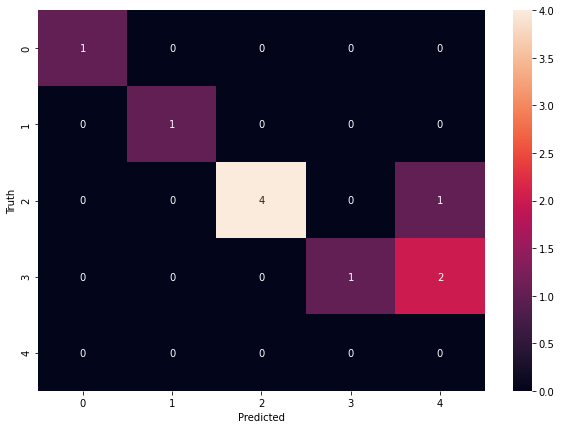

In [246]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [247]:
class_dict

{'ViratKohli': 0,
 'KamalaHarris ': 1,
 'TulsiGabbard': 2,
 'ElonMusk': 3,
 'JoeRogan': 4}

In [248]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

  Could not fetch URL https://pypi.python.org/simple/joblib/: There was a problem confirming the ssl certificate: [SSL: TLSV1_ALERT_PROTOCOL_VERSION] tlsv1 alert protocol version (_ssl.c:661) - skipping
  Could not find a version that satisfies the requirement joblib (from versions: )
No matching distribution found for joblib


['saved_model.pkl']

In [249]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))